In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import confusion_matrix

from sklearn import datasets

## Exercício - 001
Importe o conjunto de dados abaixo e utilize o método [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) para transformar a coluna _CONTENT_ em uma matriz de contagem de palavras.

https://raw.githubusercontent.com/amankharwal/Website-data/master/Youtube01-Psy.csv


In [24]:
# Carregando o conjunto de dados e conferindo suas primeiras linhas
url = 'https://raw.githubusercontent.com/amankharwal/Website-data/master/Youtube01-Psy.csv'
df = pd.read_csv(url)
print(df.head())

                                    COMMENT_ID            AUTHOR  \
0  LZQPQhLyRh80UYxNuaDWhIGQYNQ96IuCg-AYWqNPjpU         Julius NM   
1  LZQPQhLyRh_C2cTtd9MvFRJedxydaVW-2sNg5Diuo4A       adam riyati   
2  LZQPQhLyRh9MSZYnf8djyk0gEF9BHDPYrrK-qCczIY8  Evgeny Murashkin   
3          z13jhp0bxqncu512g22wvzkasxmvvzjaz04   ElNino Melendez   
4          z13fwbwp1oujthgqj04chlngpvzmtt3r3dw            GsMega   

                  DATE                                            CONTENT  \
0  2013-11-07T06:20:48  Huh, anyway check out this you[tube] channel: ...   
1  2013-11-07T12:37:15  Hey guys check out my new channel and our firs...   
2  2013-11-08T17:34:21             just for test I have to say murdev.com   
3  2013-11-09T08:28:43   me shaking my sexy ass on my channel enjoy ^_^ ﻿   
4  2013-11-10T16:05:38            watch?v=vtaRGgvGtWQ   Check this out .﻿   

   CLASS  
0      1  
1      1  
2      1  
3      1  
4      1  


In [25]:
# Transformar a coluna CONTENT em uma matriz de contagem de palavras
vectorizer = CountVectorizer() # Criando uma instância de CountVectorizer

x = vectorizer.fit_transform(df['CONTENT']) # Aplicando o CountVectorizer à coluna 'CONTENT'

## Visualizar matriz de contagem de palavras e as palavras extraídas 
print(x.toarray())
 
print(vectorizer.get_feature_names_out())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
['00' '000' '02' ... 'ｆａｎｃy' 'ｉｓ' 'ｔｈｉｓ']


## Exercício - 002
Utilize a variável _CLASS_ como variável resposta e a matriz criada acima, como variáveis preditoras, para ajustar um modelo de classificação com o método [_BernoulliNB_](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html) dividindo o conjunto de dados em treinamento e teste.

In [26]:
# Pre-processamento antes de fazer o modelo 

## Dividir os dados em variáveis independentes (x) e dependentes (y)
y = df['CLASS']  # Variável dependente

## Dividir os dados em treinamento e teste 
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1234)

In [27]:
# Criar o modelo de BernoulliNB e ajusta-lo aos dados de treinamento
modelo_bernoulli = BernoulliNB()
modelo_bernoulli.fit(x_train, y_train)

BernoulliNB()

In [28]:
# Fazer predições nos dados de teste
y_pred = modelo_bernoulli.predict(x_test)
print(y_pred)

[0 0 1 0 1 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 0 1 0 0 1 0 1 0 1 0 0 1 1 1 0 0
 1 0 1 0 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 1 0
 0 0 1 0 1 0 1 1 1 1 1 0 0 1]


In [29]:
# Avaliar o modelo
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Acurácia do modelo BernoulliNB: {accuracy:.4f}')

print("\nRelatório de Classificação:") # e mostrar relatório de classificação
print(classification_report(y_test, y_pred))

Acurácia do modelo BernoulliNB: 0.9773

Relatório de Classificação:
              precision    recall  f1-score   support

           0       0.95      1.00      0.98        41
           1       1.00      0.96      0.98        47

    accuracy                           0.98        88
   macro avg       0.98      0.98      0.98        88
weighted avg       0.98      0.98      0.98        88



## Exercício - 003
Crie uma matriz de confusão, realizando a predição no conjundo de teste gerado acima, e gere uma visualização de mapa de calor com a matriz gerada.

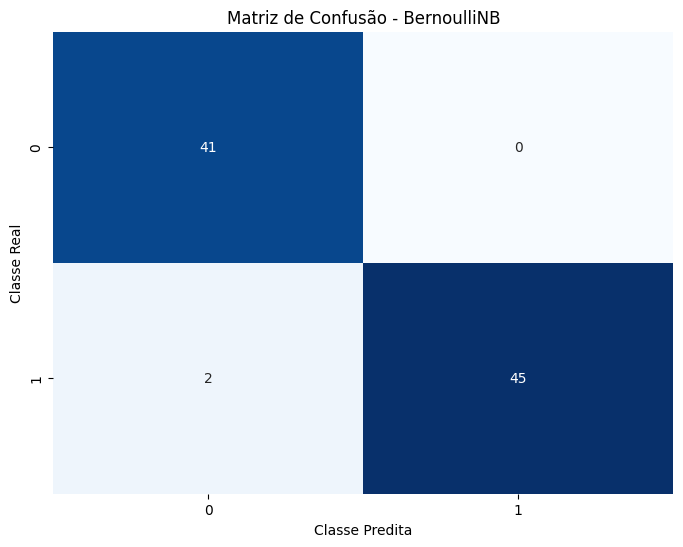

In [30]:
# Gerando a matriz de confusão
conf_matrix = confusion_matrix(y_test, y_pred)

# Visualizando a matriz de confusão com um mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Matriz de Confusão - BernoulliNB')
plt.xlabel('Classe Predita')
plt.ylabel('Classe Real')
plt.show()

## Exercício - 004

Crie uma curva ROC e calcule a área abaixo da curva utilizando o método [`roc_curve`](http://lijiancheng0614.github.io/scikit-learn/auto_examples/model_selection/plot_roc.html#example-model-selection-plot-roc-py).

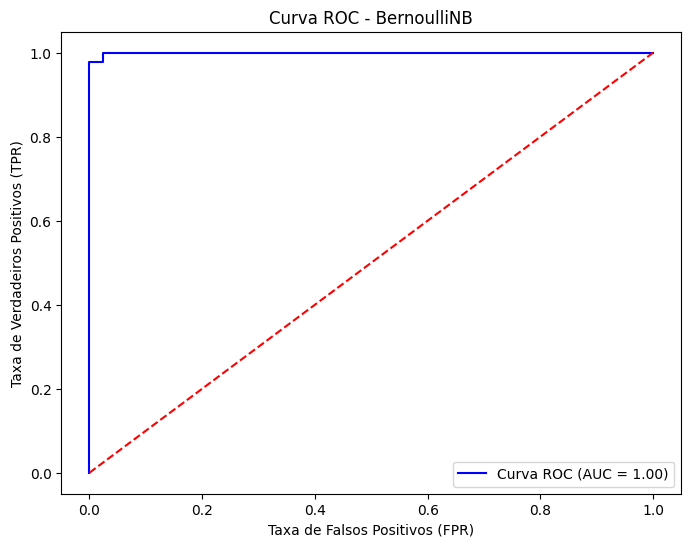

AUC: 1.00
Atenção: AUC=1 pode sugerir overfitting, i.e., modelo está ajustado de forma tão precisa aos dados de treino que pode não generalizar bem a novos dados


In [31]:
from sklearn.metrics import roc_curve, roc_auc_score

# Calculando as probabilidades de predição para a classe positiva
y_probs = modelo_bernoulli.predict_proba(x_test)[:, 1]

# Gerando os valores da curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# Calculando a área abaixo da curva (AUC)
auc = roc_auc_score(y_test, y_probs)

# Plotando a curva ROC
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'Curva ROC (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Linha diagonal
plt.title('Curva ROC - BernoulliNB')
plt.xlabel('Taxa de Falsos Positivos (FPR)')
plt.ylabel('Taxa de Verdadeiros Positivos (TPR)')
plt.legend()
plt.show()

# Exibindo o valor da AUC
print(f'AUC: {auc:.2f}')
print("Atenção: AUC=1 pode sugerir overfitting, i.e., modelo está ajustado de forma tão precisa aos dados de treino que pode não generalizar bem a novos dados")

## Exercício - 005
Repita o ajuste do modelo acima, contando as palavras na coluna _title_ e utilizando a coluna _category_ (variável resposta) para ajustar o modelo `MultinomialNB` para o seguinte conjunto de dados

https://raw.githubusercontent.com/amankharwal/Website-data/master/bbc-news-data.csv

Descreva com suas palavras que informações esse modelo fornece.

In [37]:
# Carregar o conjunto de dados e conferir 
url = "https://raw.githubusercontent.com/amankharwal/Website-data/master/bbc-news-data.csv"
df = pd.read_csv(url, sep='\t') 
print(df.head())

   category filename                              title  \
0  business  001.txt  Ad sales boost Time Warner profit   
1  business  002.txt   Dollar gains on Greenspan speech   
2  business  003.txt  Yukos unit buyer faces loan claim   
3  business  004.txt  High fuel prices hit BA's profits   
4  business  005.txt  Pernod takeover talk lifts Domecq   

                                             content  
0   Quarterly profits at US media giant TimeWarne...  
1   The dollar has hit its highest level against ...  
2   The owners of embattled Russian oil giant Yuk...  
3   British Airways has blamed high fuel prices f...  
4   Shares in UK drinks and food firm Allied Dome...  


OBS.: Apesar de ser um arquivo em csv, a última coluna é de texto e isso causa problemas 
ao colocar diretamente vírgula como separador
Por isso, vou ler como um arquivo .tsv para resolver isso.

In [39]:
# Pre-processamento antes de fazer o modelo 
## Transformar a coluna 'title' em matriz de contagem de palavras (i.e. Vetorização da coluna 'title')
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['title'])  

## Variável independente
y = df['category']

## Dividir os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)

In [40]:
# Ajustar o modelo MultinomialNB
modelo = MultinomialNB()
modelo.fit(X_train, y_train)

# Realizar predições no conjunto de teste
y_pred = modelo.predict(X_test)

In [41]:
# Imprimir o relatório de classificação
print("Relatório de Classificação:")
print(classification_report(y_test, y_pred))

Relatório de Classificação:
               precision    recall  f1-score   support

     business       0.86      0.78      0.82       146
entertainment       0.82      0.75      0.78        96
     politics       0.74      0.79      0.76        98
        sport       0.77      0.86      0.81       116
         tech       0.81      0.82      0.82       101

     accuracy                           0.80       557
    macro avg       0.80      0.80      0.80       557
 weighted avg       0.80      0.80      0.80       557



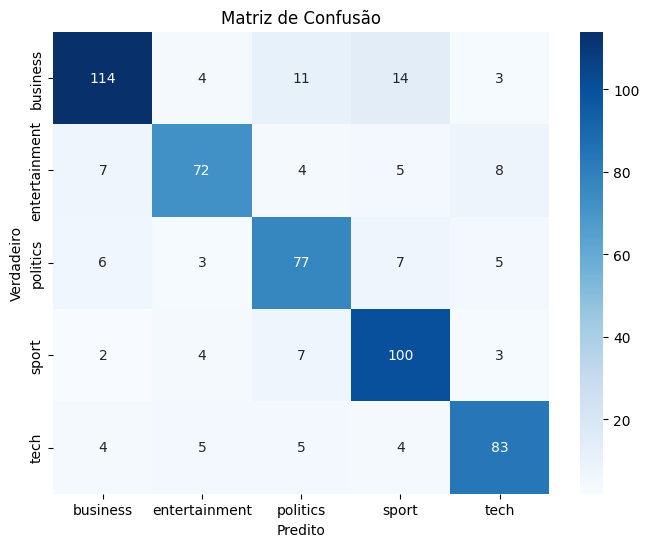

In [43]:
# Gerar matriz de confusão
cm = confusion_matrix(y_test, y_pred)

# Visualizar a matriz de confusão como um mapa de calor
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=modelo.classes_, yticklabels=modelo.classes_)
plt.title('Matriz de Confusão')
plt.xlabel('Predito')
plt.ylabel('Verdadeiro')
plt.show()

**Informações geradas pelo Modelo**
- Relatório de Classificação: apresenta métricas importantes que avaliam como o modelo se comporta em termos de:
- 1. Precisão: "Quantos exemplos classificados como positivos realmente são positivos?"
  2. Recall: "Quantos exemplos da classe positiva foram corretamente identificados pelo modelo?"
  3. F1-score: Combinação de precisão e recall
- Matriz de Confusão: oferece uma visão detalhada das classificações corretas e incorretas. As células na diagonal representam os acertos, e as células fora da diagonal indicam os erros de classificação, mostrando como o modelo se confunde entre as diferentes categorias.
- Modelo MultinomialNB: útil para dados de contagem como os vetores de palavras. Ele estima as probabilidades das classes com base na frequência das palavras em cada título, o que permite inferir a categoria do texto com base nos padrões de palavras encontradas em diferentes categorias de notícias. É ideal para lidar com texto onde a frequência de palavras é um indicador importante.
Em suma, esse modelo ajuda a entender quais palavras ou padrões de palavras aparecem com maior frequência em cada categoria de notícia, permitindo ao modelo prever a categoria de uma notícia nova a partir de seu título.

### Exercício - 006
Crie um programa que recebe um título de uma reportagem de jornal (em inglês) e utiliza o modelo ajustado acima para predizer qual a categoria da reportagem.

In [45]:
# OBS.: Se o modelo realizado não estiver no mesmo script,  você pode salvá-lo e carregá-lo usando joblib)
import joblib
## após fazer o modelo como anteriormente demonstrado (vetorizar, ajustar, etc), salve o modelo e o vetorizer
#joblib.dump(model, 'multinomial_nb_model.pkl')
#joblib.dump(vectorizer, 'vectorizer.pkl')

In [53]:
# Função para prever a categoria de uma nova reportagem
def predict_category(title):
    # Carregar o modelo e o vetorizer
    ##model = joblib.load('multinomial_nb_model.pkl')
    ##vectorizer = joblib.load('vectorizer.pkl') # se for usar um modelo de outro script, adicione essas linhas no código 

    # Transformar o título em uma matriz de contagem
    title_vector = vectorizer.transform([title])

    # Fazer a predição
    predicted_category = modelo.predict(title_vector)

    return predicted_category[0]

In [54]:
# Listar e imprimir as categorias únicas
unique_categories = df['category'].unique() # preciso saber quais categorias existem para não fugir mt do tema
print(unique_categories)

['business' 'entertainment' 'politics' 'sport' 'tech']


In [55]:
new_title = input("Digite o título da reportagem (em inglês): ")
predicted_category = predict_category(new_title)
print(f'A categoria prevista para a reportagem é: {predicted_category}')

Digite o título da reportagem (em inglês):  Madonna and Lady Gaga announce a joint concert free of charge for all their queer fans.


A categoria prevista para a reportagem é: entertainment


### Exercício - 007

Crie uma função para calcular a distância euclideana:

$d(p,q)=\sqrt{(p_1-q_1)^2+(p_2-q_2)^2+...(p_n-q_n)^2}$

Onde p e q representam dois objetos para os quais se quer calcular a distância e $p_1/q_1$ até $p_n/q_n$ as características (_features_) desses objetos.

Compare o resultado da sua função com a biblioteca _scipy_. Use o conjunto de dados das _iris_ carregado abaixo.

OBS.: distancia de p e q = raiz quadrada do somatório da diferença quadrada de cada característica de p e q

In [63]:
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.datasets import load_iris

In [64]:
iris = datasets.load_iris()
data = iris.data
data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [65]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [66]:
# Função para calcular a distância euclidiana
def euclidean_distance(p, q):
    return np.sqrt(np.sum((p - q) ** 2))

In [67]:
# Selecionando dois exemplos do conjunto de dados
p = data[0]  # Primeira amostra
q = data[1]  # Segunda amostra

# Calculando a distância euclidiana usando a função definida
dist_custom = euclidean_distance(p, q)

# Calculando a distância euclidiana usando scipy
dist_scipy = euclidean(p, q)

dist_custom, dist_scipy  # Retorna as distâncias calculadas para comparação

(0.5385164807134502, 0.5385164807134502)

A função personalizada para calcular a distância euclidiana produziu o mesmo resultado que a função da biblioteca scipy. Ambas calcularam a distância entre as duas amostras selecionadas do conjunto de dados Iris como aproximadamente 0.5385. Isso confirma que a implementação da função está correta. ​​

### Exercício - 008
Divida o conjunto de dados em treinamento e teste. Crie uma nova função, para calcular a distância (use função descrita acima) entre uma amostra no conjunto de teste para todas as amostras no conjunto de treinamento, ordernar as distâncias e retornar as amostras de _k_ menores distâncias, com o seu rótulo (_label_ ou _target_), onde _k_ é um parâmetro ajustavel pelo usuário da sua função.

In [72]:
X = iris.data  # features
y = iris.target  # rótulos
print(X)
print(y)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [73]:
# Dividindo o conjunto de dados em treinamento e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1234)

In [74]:
# Função para calcular a distância e retornar as k amostras mais próximas
def k_nearest_neighbors(test_sample, X_train, y_train, k=3):
    distances = []
    # Calculando a distância da amostra de teste para cada amostra de treinamento
    for i, train_sample in enumerate(X_train):
        dist = euclidean_distance(test_sample, train_sample)
        distances.append((dist, y_train[i]))  # Guardar a distância e o rótulo correspondente

    # Ordenando as distâncias em ordem crescente
    distances.sort(key=lambda x: x[0])
    
    # Retornando as k menores distâncias com os rótulos correspondentes
    return distances[:k]

In [75]:
# Testando a função para a primeira amostra de teste
test_sample = X_test[0]
k_nearest_neighbors(test_sample, X_train, y_train, k=5)

[(0.19999999999999973, 1),
 (0.34641016151377546, 1),
 (0.4242640687119287, 1),
 (0.45825756949558416, 2),
 (0.4690415759823425, 1)]

### Exercício - 009
Crie uma função, que a partir dos vizinhos mais próximos de uma amostra, atribuí a classe da amostra, como a classe mais frequente entre os vizinhos. Utilize as funções criadas acima.

In [76]:
import numpy as np
from scipy.stats import mode

In [91]:
# Definir função  que atribui a classe de uma amostra com base na classe mais frequente entre os vizinhos mais próximos
def assign_class(test_sample, X_train, y_train, k=3):
    # Obter os k vizinhos mais próximos
    neighbors = k_nearest_neighbors(test_sample, X_train, y_train, k=k)

    # Exibir as distâncias e os rótulos dos vizinhos
    print("Vizinhos mais próximos:")
    for dist, label in neighbors:
        print(f"Distância: {dist:.4f}, Rótulo: {label}") # para conferir se o output faz sentido

    # Extrair os rótulos dos vizinhos
    neighbor_labels = [label for _, label in neighbors]
    
    # Encontrar a classe mais frequente entre os vizinhos
    most_common_label = mode(neighbor_labels).mode
    
    return most_common_label

In [92]:
# Testando a função para a primeira amostra de teste
test_sample = X_test[0]
predicted_class = assign_class(test_sample, X_train, y_train, k=5)
print(f"A classe atribuída à amostra de teste é: {predicted_class}")

Vizinhos mais próximos:
Distância: 0.2000, Rótulo: 1
Distância: 0.3464, Rótulo: 1
Distância: 0.4243, Rótulo: 1
Distância: 0.4583, Rótulo: 2
Distância: 0.4690, Rótulo: 1
A classe atribuída à amostra de teste é: 1


### Exercício - 010
Obtenha a acurácia do seu modelo, e compare com a implementação do _sklearn_.

In [93]:
# Para o modelo implementado
## Definir função 
def calculate_accuracy(X_test, y_test, X_train, y_train, k=3):
    correct_predictions = 0
    
    # Para cada amostra de teste
    for i, test_sample in enumerate(X_test):
        predicted_class = assign_class(test_sample, X_train, y_train, k)
        if predicted_class == y_test[i]:
            correct_predictions += 1
    
    # Calculando a acurácia
    accuracy = correct_predictions / len(y_test)
    return accuracy
## Calcular acurácia
accuracy_model = calculate_accuracy(X_test, y_test, X_train, y_train, k=3)
print(f"Acurácia do modelo implementado: {accuracy_model:.4f}")

Vizinhos mais próximos:
Distância: 0.2000, Rótulo: 1
Distância: 0.3464, Rótulo: 1
Distância: 0.4243, Rótulo: 1
Vizinhos mais próximos:
Distância: 0.2449, Rótulo: 1
Distância: 0.4243, Rótulo: 1
Distância: 0.4359, Rótulo: 2
Vizinhos mais próximos:
Distância: 0.2449, Rótulo: 2
Distância: 0.2449, Rótulo: 2
Distância: 0.3317, Rótulo: 2
Vizinhos mais próximos:
Distância: 0.2236, Rótulo: 0
Distância: 0.2646, Rótulo: 0
Distância: 0.3317, Rótulo: 0
Vizinhos mais próximos:
Distância: 0.3873, Rótulo: 1
Distância: 0.5196, Rótulo: 1
Distância: 0.5292, Rótulo: 1
Vizinhos mais próximos:
Distância: 0.1414, Rótulo: 0
Distância: 0.1732, Rótulo: 0
Distância: 0.2236, Rótulo: 0
Vizinhos mais próximos:
Distância: 0.1414, Rótulo: 0
Distância: 0.1414, Rótulo: 0
Distância: 0.1414, Rótulo: 0
Vizinhos mais próximos:
Distância: 0.2236, Rótulo: 0
Distância: 0.3000, Rótulo: 0
Distância: 0.3162, Rótulo: 0
Vizinhos mais próximos:
Distância: 0.1414, Rótulo: 1
Distância: 0.2236, Rótulo: 1
Distância: 0.2449, Rótulo: 1
V

In [94]:
# Para o modelo com sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

## Criando e treinando o classificador k-NN do sklearn
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)

## Prevendo as classes para as amostras de teste
y_pred = knn.predict(X_test)

## Calculando a acurácia usando o sklearn
accuracy_sklearn = accuracy_score(y_test, y_pred)
print(f"Acurácia do modelo sklearn: {accuracy_sklearn:.4f}")

Acurácia do modelo sklearn: 0.9737


### Exercício - 011
Crie uma função que recebe um conjunto de treinamento (com duas dimensões, duas características), um ponto para teste (com duas dimensões, duas características), utiliza o programa criado acima para atribuir a classe e produz um gráfico em 2 dimensões com o novo ponto classificado.

In [96]:
import matplotlib.pyplot as plt

# Função para plotar os pontos e classificar um novo ponto de teste
def plot_classification_2D(X_train, y_train, test_point, k=3):
    # Classificar o novo ponto de teste
    classified_label = assign_class(test_point, X_train, y_train, k)
    
    # Mapear as classes para cores
    colors = ['r', 'g', 'b']  # Definindo cores para cada classe
    class_names = ['Classe 0', 'Classe 1', 'Classe 2']

    # Criando o gráfico
    plt.figure(figsize=(8, 6))
    
    # Plotar os pontos de treinamento
    for class_value in set(y_train):
        plt.scatter(X_train[y_train == class_value, 0], 
                    X_train[y_train == class_value, 1], 
                    c=colors[class_value], label=class_names[class_value])
    
    # Plotar o novo ponto classificado
    plt.scatter(test_point[0], test_point[1], c='k', marker='x', s=200, label=f'Novo Ponto (Classe {classified_label})')
    
    # Adicionar legendas e título
    plt.legend()
    plt.title(f'Classificação do Ponto Novo com k={k}')
    plt.xlabel('Característica 1')
    plt.ylabel('Característica 2')
    
    # Mostrar o gráfico
    plt.show()

Vizinhos mais próximos:
Distância: 0.0000, Rótulo: 2
Distância: 0.1000, Rótulo: 2
Distância: 0.1414, Rótulo: 1
Distância: 0.1414, Rótulo: 1
Distância: 0.2000, Rótulo: 2


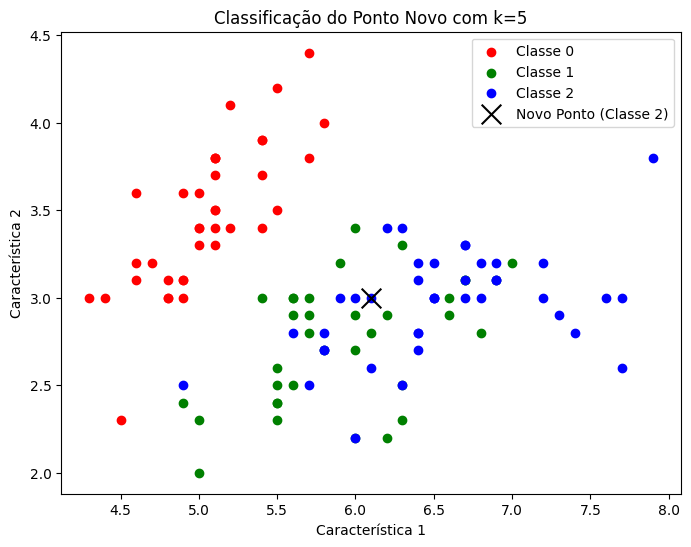

In [97]:
# Testar a função com as primeiras 2 características do conjunto iris (X_train com duas dimensões)
X_train_2D = X_train[:, :2]  # Pegando apenas as duas primeiras características
test_point = X_test[0, :2]   # Pegando o primeiro ponto de teste com duas características

# Chamar a função para plotar e classificar
plot_classification_2D(X_train_2D, y_train, test_point, k=5)